In [ ]:
!pip install numpy==1.21.0

In [ ]:
!pip install arviz==0.10.0

In [ ]:
!pip install pymc3==3.10.0

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
from sklearn.linear_model import LogisticRegression
import pymc3 as pm

## The Dataset

You can download the dataset from here: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

# Part 1

In [ ]:
# .csv file saved in google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## 1 point

## ToDo: read the csv file into a dataframe and show the first 5 rows

filename1 = 'diabetes.csv'
conn1 = '/content/drive/My Drive/' + filename1

diab_df = pd.read_csv(conn1)

diab_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Part 2

In [ ]:
## 3 points

## Assign the Outcome variable to y and the rest to X.
## USe LogisticRegression to fit the data and print out the intercept and the coefficients
X = []
y = []

for i in range(len(diab_df)):
  data = diab_df.loc[i][0:8]
  outcomes = diab_df.loc[i][8]

  X.append(data)
  y.append(outcomes)

X = pd.DataFrame(X)
y = pd.DataFrame(y, columns = ['Outcome'])

In [ ]:
Model = LogisticRegression()  
Model.fit(X,y)

Coefficient = Model.coef_
Intercept = Model.intercept_


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print('The coefficients for each of the variables are:\n',Coefficient)
print('The intercept for the logistic regression is:\n',Intercept)

The coefficients for each of the variables are:
 [[ 1.17252342e-01  3.35998330e-02 -1.40873785e-02 -1.27048112e-03
  -1.24032092e-03  7.72023486e-02  1.41904173e+00  1.00353713e-02]]
The intercept for the logistic regression is:
 [-7.70291291]


# Part 3

In [ ]:
## 2 points

## Explain what the code is doing:
## What are the prior probabilities of the intercept and coefficients?
# Which likelihood distribution has been used?
## What does pm.invlogit(linreg) mean?
## What is map_est?

with pm.Model() as logreg_model:
  
    w0 = pm.Normal('w0', mu=0, sd=100)
    w1 = pm.Normal('w1', mu=0, sd=100)
    w2 = pm.Normal('w2', mu=0, sd=100)
    w3 = pm.Normal('w3', mu=0, sd=100)
    w4 = pm.Normal('w4', mu=0, sd=100)
    w5 = pm.Normal('w5', mu=0, sd=100)
    w6 = pm.Normal('w6', mu=0, sd=100)
    w7 = pm.Normal('w7', mu=0, sd=100)
    w8 = pm.Normal('w8', mu=0, sd=100)
   
    
    linreg = w0 * np.ones(diab_df.shape[0]) + w1 * diab_df.Pregnancies.values + w2 * diab_df.Glucose.values \
    + w3 * diab_df.BloodPressure.values + w4 * diab_df.SkinThickness.values + w5 * diab_df.Insulin.values + \
    w6 * diab_df.BMI.values + w7 * diab_df.DiabetesPedigreeFunction.values + w8 * diab_df.Age.values
    p_outcome = pm.invlogit(linreg)

    likelihood = pm.Bernoulli('likelihood', p_outcome, observed=diab_df.Outcome.values)

    
    map_est= pm.find_MAP()
    print(map_est)


{'w0': array(-8.40514423), 'w1': array(0.12314355), 'w2': array(0.03516495), 'w3': array(-0.01330046), 'w4': array(0.00061832), 'w5': array(-0.00119234), 'w6': array(0.08971699), 'w7': array(0.94525108), 'w8': array(0.01487846)}


1. What is the code doing?

  This code creates a model, and then creates priors for each of the model parameters. These priors are based on a normal distribution with mean = 0 and standard deviation = 100. These priors are then used to create a regression equation using each of the variables and the corresponding coefficients. A prediction of the patient having diabetes is then calculated from the regression equation using the inverse logit function. A Bernoulli distribution is then used to find the likelihood of the predicted outcome. The map_est then finds the maximum a posteriori for the intercepts and coefficients.

2. What are the prior probabilities of the intercept and coefficients?

  The prior probability of the intercept is w0 and the prior probabilities of the coefficients are w1 - w8. They start as normal distributions around a mean of 0 and standard deviation of 100.

3. Which likelihood distribution has been used?

  The Bernoulli distribution is used for the likelihood.

4. What does the pm.invlogit(linreg) mean?

  The pm.invlogit calculates a prediction from the regression equation using the inverse logit function. It outputs a value between 0 and 1, which estimates the probability of an outcome occurring.

5. What is map_est?

  The map_est finds the maximum a posteriori of each of the intercepts and coefficients in the model.

# Part 4

/usr/local/lib/python3.9/dist-packages/pymc3/sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(


ERROR:pymc3:The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.
/usr/local/lib/python3.9/dist-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<Axes: title={'center': 'w0'}>, <Axes: title={'center': 'w1'}>,
        <Axes: title={'center': 'w2'}>],
       [<Axes: title={'center': 'w3'}>, <Axes: title={'center': 'w4'}>,
        <Axes: title={'center': 'w5'}>],
       [<Axes: title={'center': 'w6'}>, <Axes: title={'center': 'w7'}>,
        <Axes: title={'center': 'w8'}>]], dtype=object)

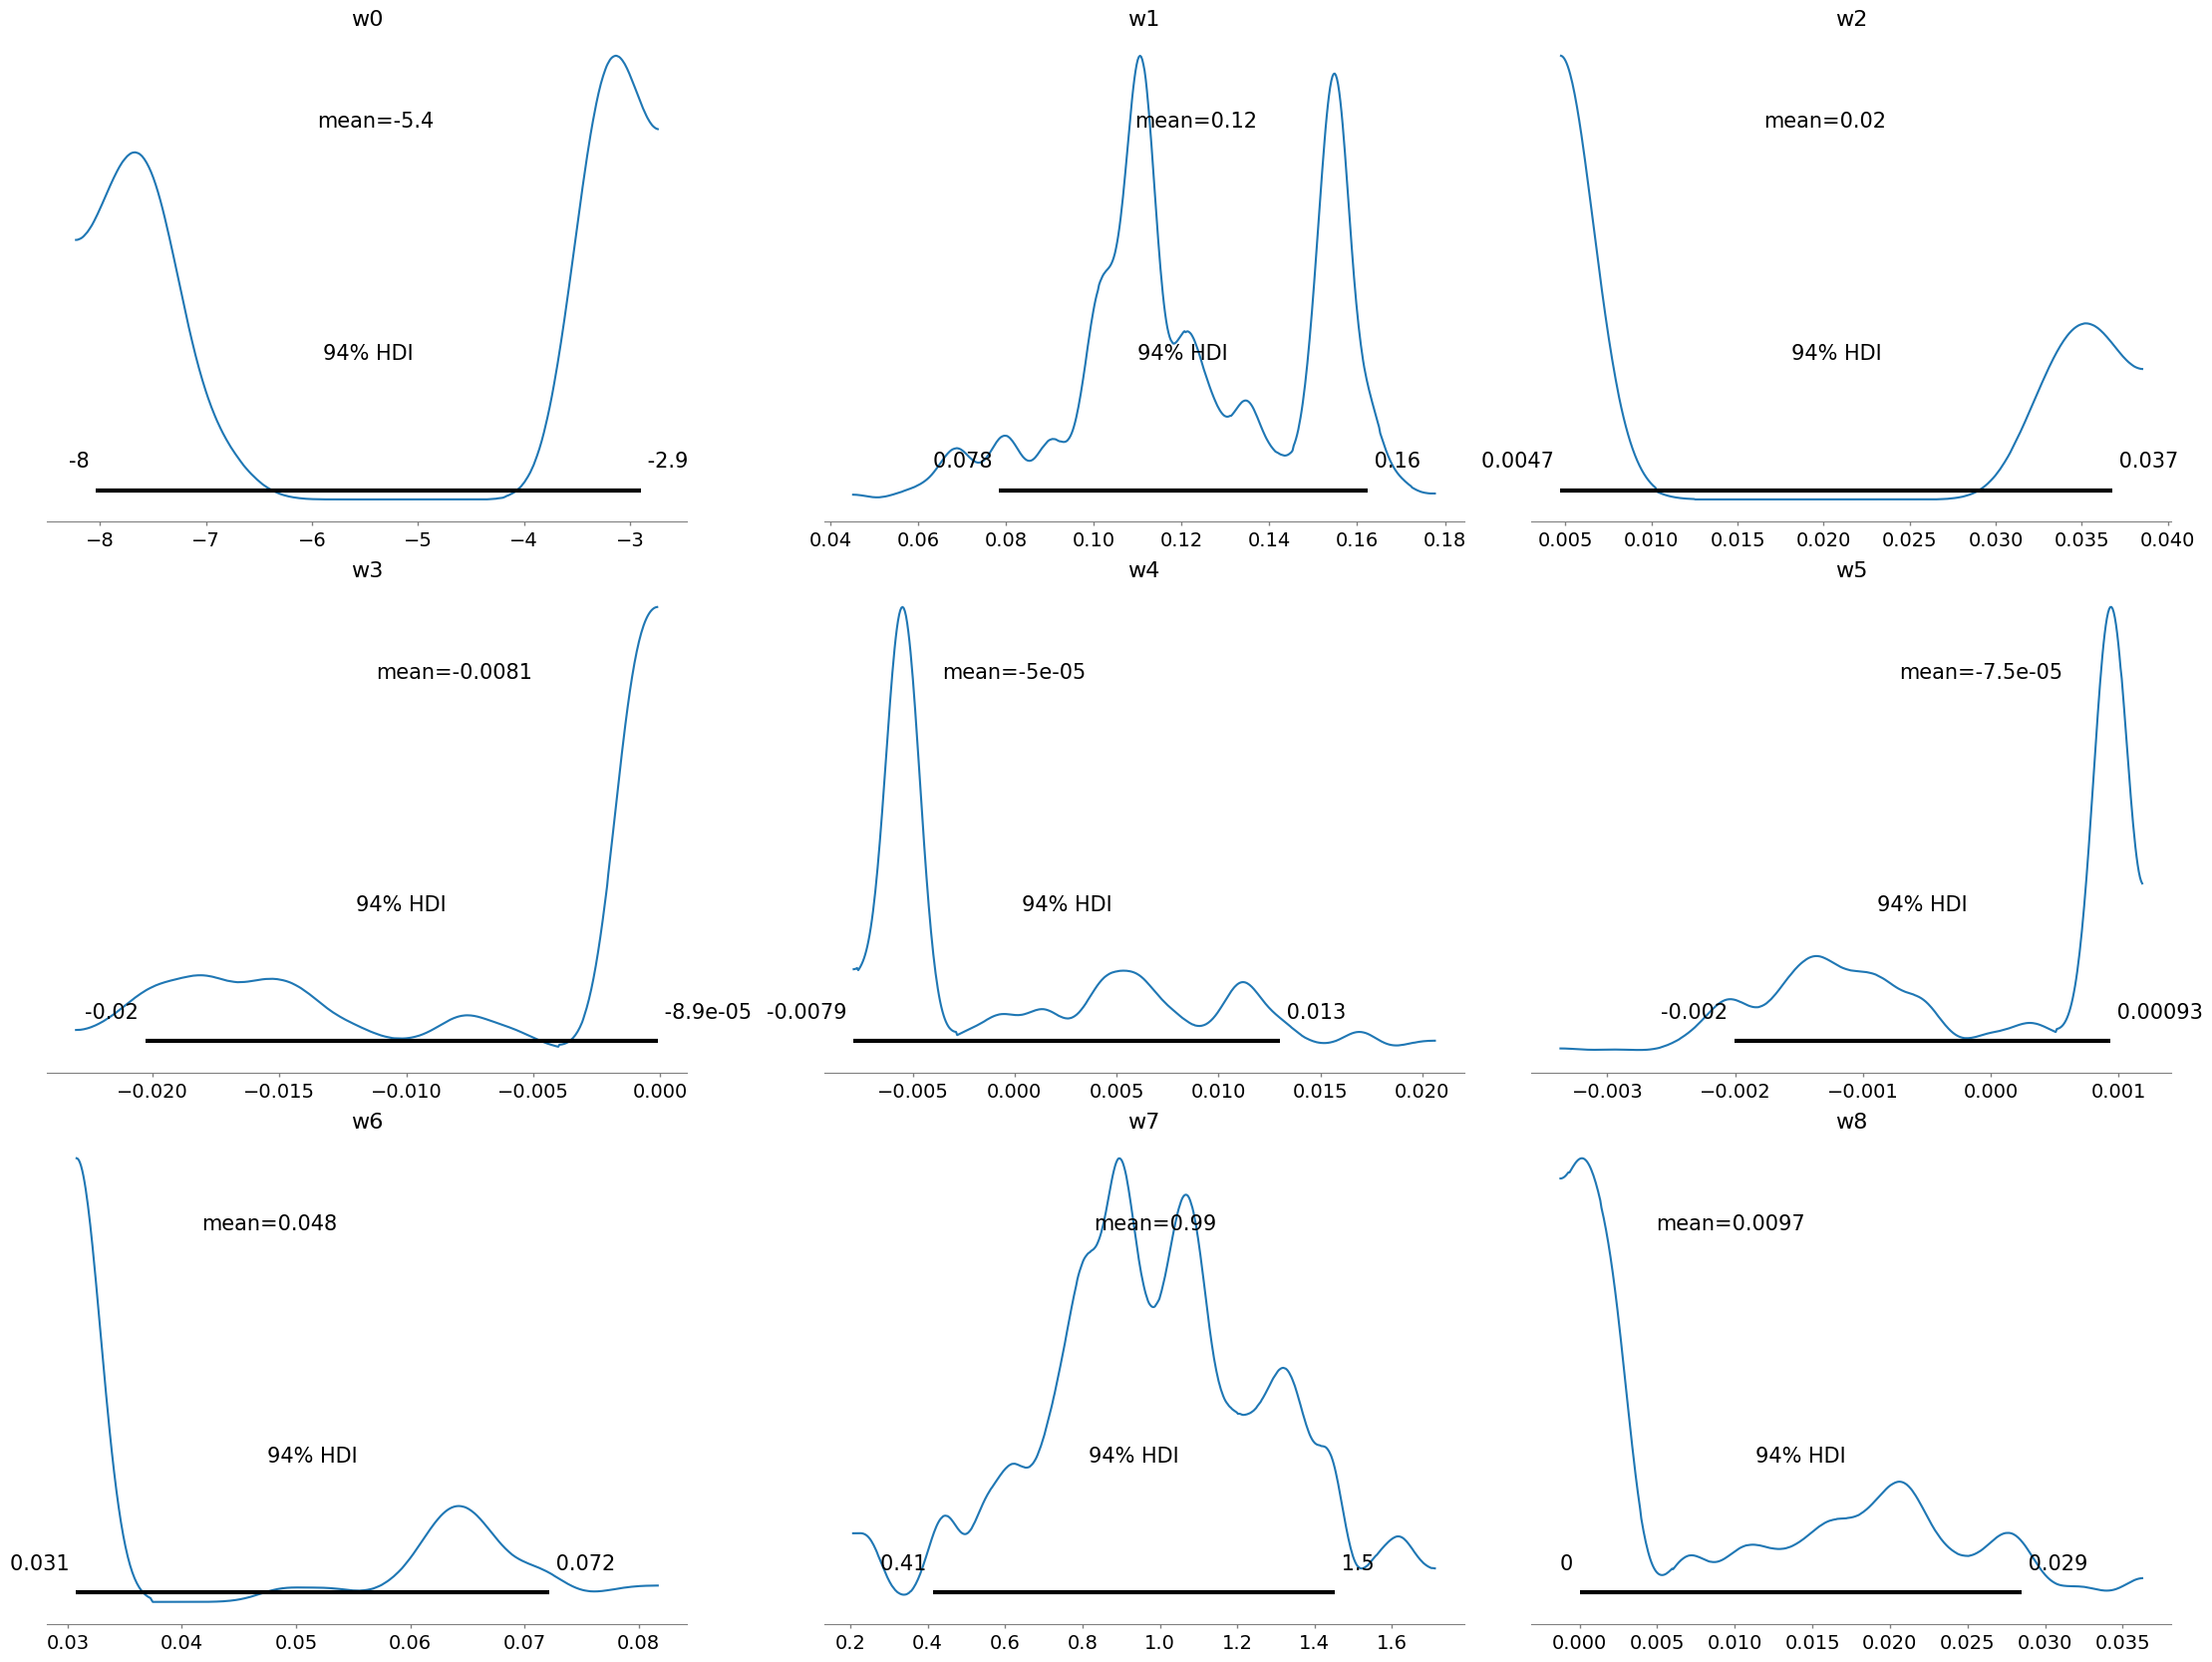

In [ ]:
## 2 points

with logreg_model:
## ToDo: draw 400 samples using pm.Metropolis() and assign to the variable trace
  trace = pm.sample(400, step=pm.Metropolis())


## Explain the output of the plot 
az.plot_posterior(trace)

1. Explain the output of the plot?

  The plots represent each of the prior probabilities of the coefficients. The higher the graph is on the y-axis, the more that value showed up in the coefficient calculations. The mean is the average of each coefficient for each of the 400 samples. Based on the samples we are 94% sure that the true value of the coefficient falls between the edges of the plot. For example in w0, we can expect the true mean to fall between -8 and -2.9. Although the mean is -5.4, we can see that the majority of the coefficients calculated were closer to either -8 or -2.9, rather than -5.4. For w7, the mean is closer to where the majority of the calculated coefficients were located.